In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint

from keras import backend as K

from util.plots import plot_history
from util.models import cnn_net

from keras.utils.np_utils import to_categorical
from util.data_generator import make_data_generator

from glob import glob
import os
import util.image_import as ii

Using TensorFlow backend.


In [2]:
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

mean_image_train = ii.calulate_mean("../dataset3/res_crop/train")

def subtract_mean(img):
    return img - mean_image_train

In [3]:
train_path = '../dataset3/res_crop/train'
test_path = '../dataset3/res_crop/test'
batch_size = 32
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=True)

Found Training 1875 images belonging to 8 classes
Found Test 472 images belonging to 8 classes


In [ ]:
model = cnn_net()

In [ ]:
# Checkpoint
file_path = 'saved_models/crop_cnn.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

In [6]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1875 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=472 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
58/58 [==============================] - 16s 283ms/step - loss: 1.9378 - acc: 0.2883 - val_loss: 1.3570 - val_acc: 0.5536

Epoch 00001: val_acc improved from -inf to 0.55357, saving model to saved_models/crop_cnn.e01-a0.55.hdf5
Epoch 2/100
58/58 [==============================] - 15s 263ms/step - loss: 1.3463 - acc: 0.4778 - val_loss: 0.9818 - val_acc: 0.6795

Epoch 00002: val_acc improved from 0.55357 to 0.67955, saving model to saved_models/crop_cnn.e02-a0.68.hdf5
Epoch 3/100
58/58 [==============================] - 16s 276ms/step - loss: 1.0851 - acc: 0.5653 - val_loss: 0.7043 - val_acc: 0.7295

Epoch 00003: val_acc improved from 0.67955 to 0.72955, saving model to saved_models/crop_cnn.e03-a0.73.hdf5
Epoch 4/100
58/58 [==============================] - 17s 287ms/step - loss: 0.9892 - acc: 0.5994 - val_loss: 0.7226 - val_acc: 0.7705

Epoch 00004: val_acc improved from 0.72955 to 0.77045, saving model to saved_models/crop_cnn.e04-a0.77.hdf5
Epoch 5/100
58/58 [============

58/58 [==============================] - 17s 299ms/step - loss: 0.3149 - acc: 0.8936 - val_loss: 0.1836 - val_acc: 0.9500

Epoch 00084: val_acc did not improve from 0.96591
Epoch 85/100
58/58 [==============================] - 19s 335ms/step - loss: 0.2869 - acc: 0.8944 - val_loss: 0.2350 - val_acc: 0.9545

Epoch 00085: val_acc did not improve from 0.96591
Epoch 86/100
58/58 [==============================] - 17s 287ms/step - loss: 0.3220 - acc: 0.8845 - val_loss: 0.1781 - val_acc: 0.9500

Epoch 00086: val_acc did not improve from 0.96591
Epoch 87/100
58/58 [==============================] - 20s 349ms/step - loss: 0.3178 - acc: 0.8911 - val_loss: 0.1555 - val_acc: 0.9614

Epoch 00087: val_acc did not improve from 0.96591
Epoch 88/100
58/58 [==============================] - 19s 327ms/step - loss: 0.3064 - acc: 0.8925 - val_loss: 0.1834 - val_acc: 0.9477

Epoch 00088: val_acc did not improve from 0.96591
Epoch 89/100
58/58 [==============================] - 18s 318ms/step - loss: 0.2822

All classes

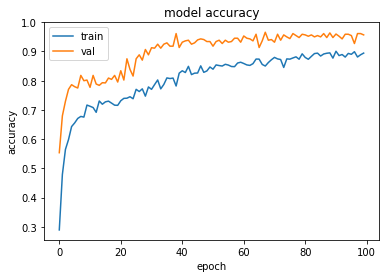

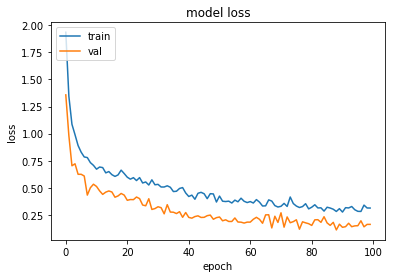

In [8]:
plot_history(history, save=False, path='saved_plots/', name='test_cnn_all')

Without catfood beef

In [4]:
train_generator, test_generator = make_data_generator(train_path, test_path, load_ram=True, ignore=['catfood_beef'])

Found Training 1641 images belonging to 7 classes
Found Test 413 images belonging to 7 classes


In [5]:
model = cnn_net(out_size=7)
# Checkpoint
file_path = 'saved_models/crop_cnn_rembeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1641 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=413 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
51/51 [==============================] - 17s 326ms/step - loss: 1.8842 - acc: 0.2427 - val_loss: 1.3957 - val_acc: 0.3750

Epoch 00001: val_acc improved from -inf to 0.37500, saving model to saved_models/crop_cnn_rembeef.e01-a0.38.hdf5
Epoch 2/100
51/51 [==============================] - 14s 277ms/step - loss: 1.4758 - acc: 0.3748 - val_loss: 1.0837 - val_acc: 0.5538

Epoch 00002: val_acc improved from 0.37500 to 0.55381, saving model to saved_models/crop_cnn_rembeef.e02-a0.55.hdf5
Epoch 3/100
51/51 [==============================] - 13s 258ms/step - loss: 1.3334 - acc: 0.4517 - val_loss: 0.9470 - val_acc: 0.6535

Epoch 00003: val_acc improved from 0.55381 to 0.65354, saving model to saved_models/crop_cnn_rembeef.e03-a0.65.hdf5
Epoch 4/100
51/51 [==============================] - 14s 271ms/step - loss: 1.1772 - acc: 0.5048 - val_loss: 0.7729 - val_acc: 0.7323

Epoch 00004: val_acc improved from 0.65354 to 0.73228, saving model to saved_models/crop_cnn_rembeef.e04-a0.73.hdf5

51/51 [==============================] - 17s 330ms/step - loss: 0.5175 - acc: 0.7996 - val_loss: 0.1530 - val_acc: 0.9635

Epoch 00040: val_acc did not improve from 0.97900
Epoch 41/100
51/51 [==============================] - 16s 317ms/step - loss: 0.4951 - acc: 0.7977 - val_loss: 0.1405 - val_acc: 0.9659

Epoch 00041: val_acc did not improve from 0.97900
Epoch 42/100
51/51 [==============================] - 17s 331ms/step - loss: 0.4917 - acc: 0.8192 - val_loss: 0.1354 - val_acc: 0.9659

Epoch 00042: val_acc did not improve from 0.97900
Epoch 43/100
51/51 [==============================] - 17s 329ms/step - loss: 0.5069 - acc: 0.7999 - val_loss: 0.1576 - val_acc: 0.9580

Epoch 00043: val_acc did not improve from 0.97900
Epoch 44/100
51/51 [==============================] - 16s 310ms/step - loss: 0.4769 - acc: 0.8180 - val_loss: 0.1563 - val_acc: 0.9685

Epoch 00044: val_acc did not improve from 0.97900
Epoch 45/100
51/51 [==============================] - 18s 357ms/step - loss: 0.4839

51/51 [==============================] - 18s 355ms/step - loss: 0.4361 - acc: 0.8232 - val_loss: 0.0766 - val_acc: 0.9843

Epoch 00083: val_acc improved from 0.98163 to 0.98425, saving model to saved_models/crop_cnn_rembeef.e83-a0.98.hdf5
Epoch 84/100
51/51 [==============================] - 20s 393ms/step - loss: 0.4090 - acc: 0.8354 - val_loss: 0.1535 - val_acc: 0.9633

Epoch 00084: val_acc did not improve from 0.98425
Epoch 85/100
51/51 [==============================] - 16s 311ms/step - loss: 0.4505 - acc: 0.8182 - val_loss: 0.1289 - val_acc: 0.9711

Epoch 00085: val_acc did not improve from 0.98425
Epoch 86/100
51/51 [==============================] - 18s 348ms/step - loss: 0.4067 - acc: 0.8272 - val_loss: 0.1420 - val_acc: 0.9554

Epoch 00086: val_acc did not improve from 0.98425
Epoch 87/100
51/51 [==============================] - 19s 363ms/step - loss: 0.4196 - acc: 0.8351 - val_loss: 0.1045 - val_acc: 0.9843

Epoch 00087: val_acc improved from 0.98425 to 0.98425, saving model

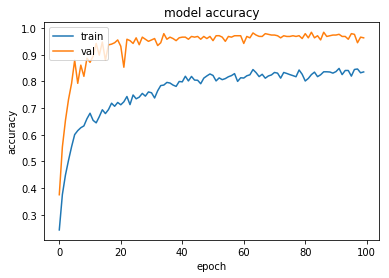

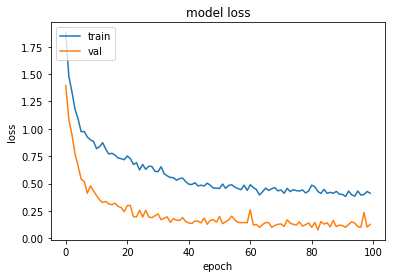

In [6]:
plot_history(history, save=False, path='saved_plots/', name='test_cnn_removed_beef')

In [5]:
model = cnn_net(out_size=7)
# Checkpoint
file_path = 'saved_models/crop_cnn_rembeef.e{epoch:02d}-a{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
# Training
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1641 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=413 // batch_size,
            use_multiprocessing=True,
            workers=2,
            callbacks=callback_list
)

Epoch 1/100
51/51 [==============================] - 13s 252ms/step - loss: 2.0075 - acc: 0.3068 - val_loss: 1.2759 - val_acc: 0.5807

Epoch 00001: val_acc improved from -inf to 0.58073, saving model to saved_models/crop_cnn_rembeef.e01-a0.58.hdf5
Epoch 2/100
51/51 [==============================] - 13s 249ms/step - loss: 1.1676 - acc: 0.5400 - val_loss: 0.8534 - val_acc: 0.7428

Epoch 00002: val_acc improved from 0.58073 to 0.74278, saving model to saved_models/crop_cnn_rembeef.e02-a0.74.hdf5
Epoch 3/100
51/51 [==============================] - 13s 251ms/step - loss: 0.8265 - acc: 0.6902 - val_loss: 0.5261 - val_acc: 0.9108

Epoch 00003: val_acc improved from 0.74278 to 0.91076, saving model to saved_models/crop_cnn_rembeef.e03-a0.91.hdf5
Epoch 4/100
51/51 [==============================] - 23s 455ms/step - loss: 0.6558 - acc: 0.7447 - val_loss: 0.3819 - val_acc: 0.9003

Epoch 00004: val_acc did not improve from 0.91076
Epoch 5/100
51/51 [==============================] - 22s 429ms/st

51/51 [==============================] - 14s 284ms/step - loss: 0.2246 - acc: 0.9040 - val_loss: 0.0965 - val_acc: 0.9606

Epoch 00042: val_acc did not improve from 0.97900
Epoch 43/100
51/51 [==============================] - 16s 306ms/step - loss: 0.2414 - acc: 0.8952 - val_loss: 0.1029 - val_acc: 0.9738

Epoch 00043: val_acc did not improve from 0.97900
Epoch 44/100
51/51 [==============================] - 15s 290ms/step - loss: 0.2109 - acc: 0.9176 - val_loss: 0.0700 - val_acc: 0.9711

Epoch 00044: val_acc did not improve from 0.97900
Epoch 45/100
51/51 [==============================] - 15s 300ms/step - loss: 0.2023 - acc: 0.9087 - val_loss: 0.1884 - val_acc: 0.9633

Epoch 00045: val_acc did not improve from 0.97900
Epoch 46/100
51/51 [==============================] - 15s 286ms/step - loss: 0.2658 - acc: 0.8912 - val_loss: 0.0815 - val_acc: 0.9764

Epoch 00046: val_acc did not improve from 0.97900
Epoch 47/100
51/51 [==============================] - 16s 316ms/step - loss: 0.2011

51/51 [==============================] - 14s 271ms/step - loss: 0.1568 - acc: 0.9436 - val_loss: 0.0745 - val_acc: 0.9764

Epoch 00085: val_acc did not improve from 0.98163
Epoch 86/100
51/51 [==============================] - 14s 266ms/step - loss: 0.1410 - acc: 0.9424 - val_loss: 0.1086 - val_acc: 0.9659

Epoch 00086: val_acc did not improve from 0.98163
Epoch 87/100
51/51 [==============================] - 13s 258ms/step - loss: 0.1180 - acc: 0.9577 - val_loss: 0.0522 - val_acc: 0.9790

Epoch 00087: val_acc did not improve from 0.98163
Epoch 88/100
51/51 [==============================] - 14s 276ms/step - loss: 0.1383 - acc: 0.9525 - val_loss: 0.0824 - val_acc: 0.9816

Epoch 00088: val_acc did not improve from 0.98163
Epoch 89/100
51/51 [==============================] - 16s 306ms/step - loss: 0.1269 - acc: 0.9540 - val_loss: 0.0935 - val_acc: 0.9816

Epoch 00089: val_acc did not improve from 0.98163
Epoch 90/100
51/51 [==============================] - 16s 310ms/step - loss: 0.1312

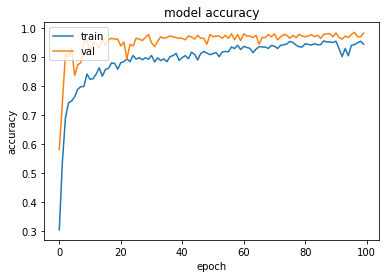

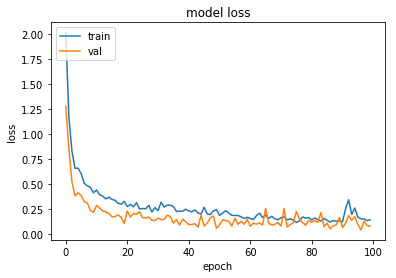

In [6]:
plot_history(history, save=False, path='saved_plots/', name='test_cnn_removed_beef')

|Summarize             | Epoch | Training Loss | Training Accuracy | Validation Loss | Validation Accuracy |
|:--------------------:|:-----:|:-------------:|:-----------------:|:---------------:|:-------------------:|
| All Classes          |   68  |     0.3775    |      0.8509       |      0.1321     |        0.9659       |
| Without catfood beef |   97  |     0.1524    |      0.9442       |      0.0415     |        0.9869       |